In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Input

import os

In [2]:
batch_size = 16
num_classes = 10
epochs = 30

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
y_train[1]

array([9], dtype=uint8)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
n_kernels = 32
x1 = Input((32,32,3))
x = Conv2D(64,(3,3), kernel_initializer='he_normal', use_bias=False, padding='same')(x1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.1)(x)
x = Conv2D(128,(3,3), kernel_initializer='he_normal', use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.1)(x)
x = Conv2D(256,(3,3), kernel_initializer='he_normal', use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Flatten()(x)
last_x = Dense(num_classes, activation='softmax')(x)

In [9]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
model = Model(inputs=[x1], outputs=[last_x])
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [11]:
trained_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Epoch 1/30
3125/3125 [==============================] - 48s 6ms/step - loss: 1.4304 - accuracy: 0.5011 - val_loss: 1.3317 - val_accuracy: 0.5445
Epoch 2/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0825 - accuracy: 0.6249 - val_loss: 1.2904 - val_accuracy: 0.5831
Epoch 3/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.9466 - accuracy: 0.6727 - val_loss: 1.0436 - val_accuracy: 0.6532
Epoch 4/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.8441 - accuracy: 0.7092 - val_loss: 1.0327 - val_accuracy: 0.6611
Epoch 5/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.7740 - accuracy: 0.7350 - val_loss: 0.8987 - val_accuracy: 0.6974
Epoch 6/30
3125/3125 [==============================] - 17s 6ms/step - loss: 0.7140 - accuracy: 0.7535 - val_loss: 0.8938 - val_accuracy: 0.7119
Epoch 7/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6631 - accuracy: 0.7717 - val_loss: 1.0052 - val_ac

In [14]:
epochs_range = range(30)
validation_accuracy = trained_model.history['val_accuracy']
training_accuracy = trained_model.history['accuracy']

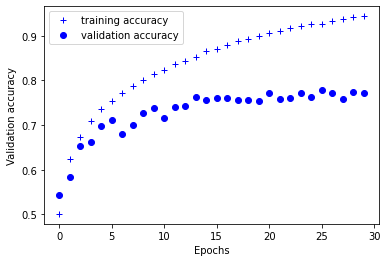

In [15]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# 만족할만한 결과물이 나오진 않았음.

313/313 [==============================] - 1s 4ms/step - loss: 0.8911 - accuracy: 0.7720
Test loss: 0.8911337852478027
Test accuracy: 0.7720000147819519
